## 1. CompressSensing toolbox

CompressSesing class provides tools to read wav signal, build periodic signal multi-frequency, compress it with random sampling and recovered it with L1-minimimazation solver

In [1]:
from signal_frame import *
from l1min import *
import pandas as pd

## 2. Simulated periodic signal

### 2.1. Baseline : One frequence

This "baseline" allow us to experiment different parameters which plays 

In [3]:
sf = SignalFrame()

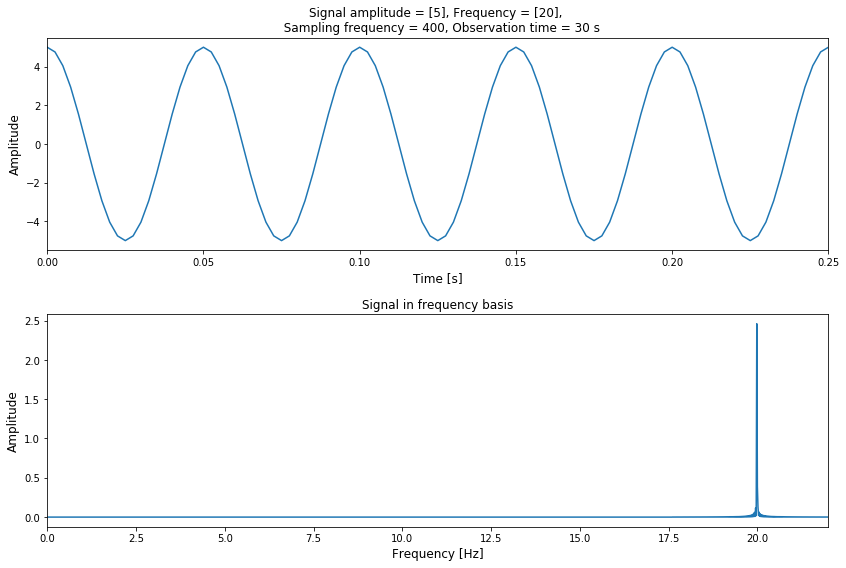

In [7]:
obs_time = 30
cos1 = sf.signal_gen(a=[5], f=[20], observation_time=obs_time, noise_level=0, plot=True)

In [4]:
cos1.describe()

Fundamental frequencies : [10] Hz
Signal amplitudes : [5]
Observation time : 30 s
Signal definition : 6001 instants
Nyquist–Shannon criterion (rate) : 0.1



### 2.1.3 Sampling at Nyquist-Shannon frequency


Sampling process: 
Law : Truncated gaussian1
Mean : centred ; Variance : 1
Lenght of initial signal : 6001 
Lenght of sampled signal: 667
Sampling rate : 0.110


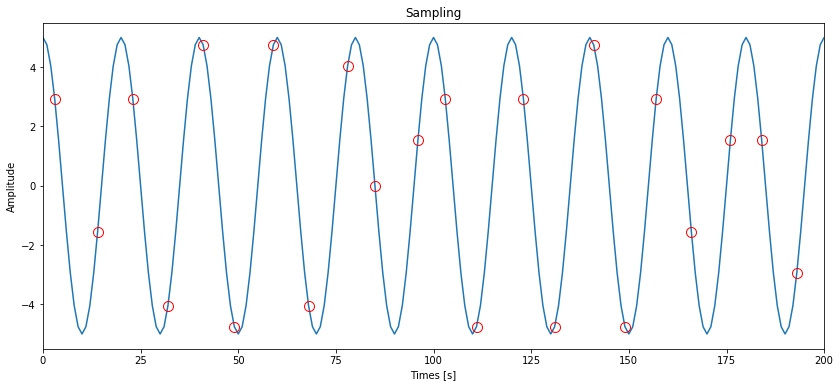

In [59]:
cos1.sampler_gauss(rate=0.11)

signal_sampled = cos1.temporal_sampled
phi = cos1.phi

#### With a too small constraint on L1-norm

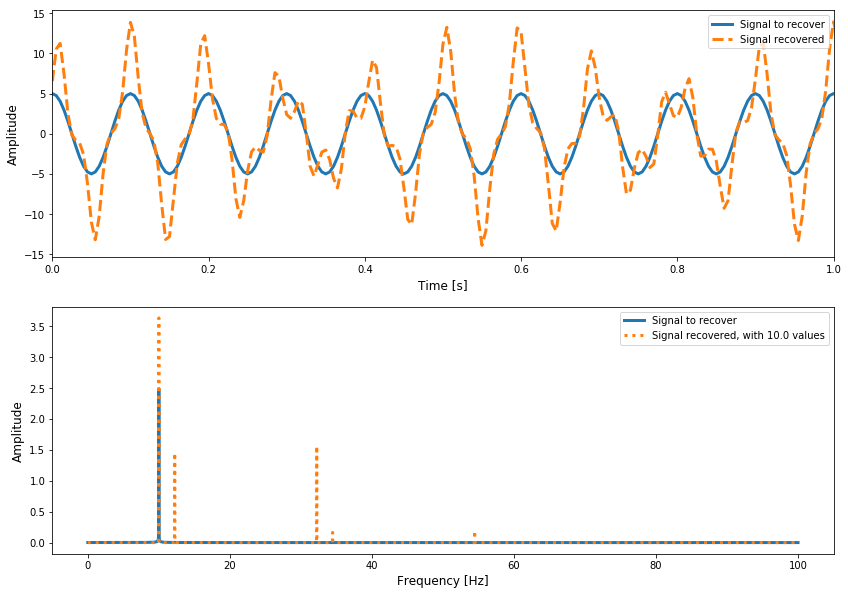

In [71]:
l1 = L1min()
cos1_recovered = l1.solver(signal_sampled, phi, w=200, max_iter=400, plot_result=False)

l1.plot_score(cos1.temporal, cos1_recovered, observation_time=obs_time)

#### With a constraint on L1-norm close to the best 

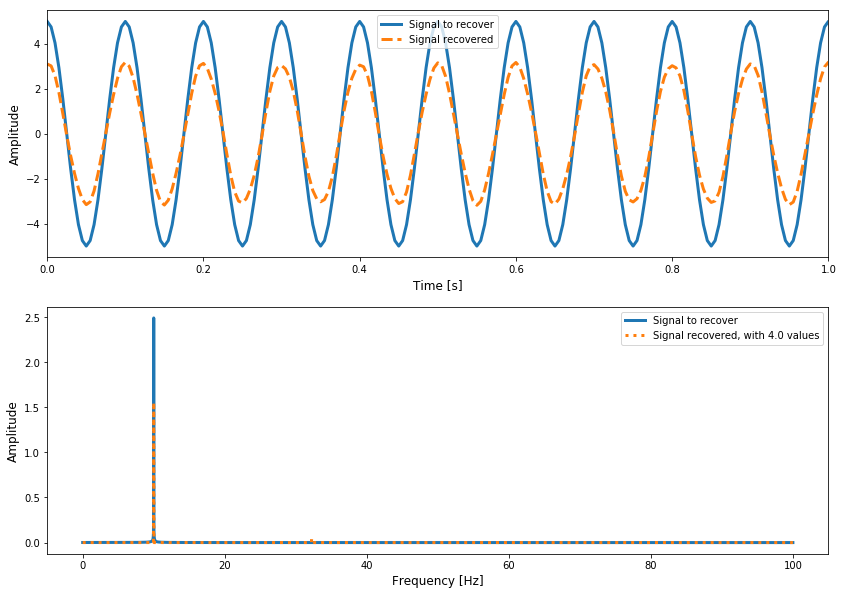

In [70]:
l1 = L1min()
cos1_recovered = l1.solver(signal_sampled, phi, w=315, max_iter=400, plot_result=False)

l1.plot_score(cos1.temporal, cos1_recovered, observation_time=obs_time)

### 2.1.2 Sampling under Nyquist-Shannon frequency


Sampling process: 
Law : Truncated gaussian1
Mean : centred ; Variance : 1
Lenght of initial signal : 6001 
Lenght of sampled signal: 182
Sampling rate : 0.030


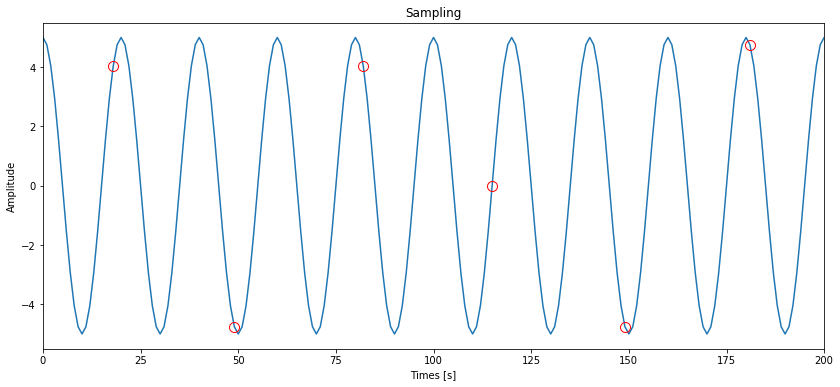

In [115]:
cos1.sampler_gauss(rate=0.03)

signal_sampled = cos1.temporal_sampled
phi = cos1.phi

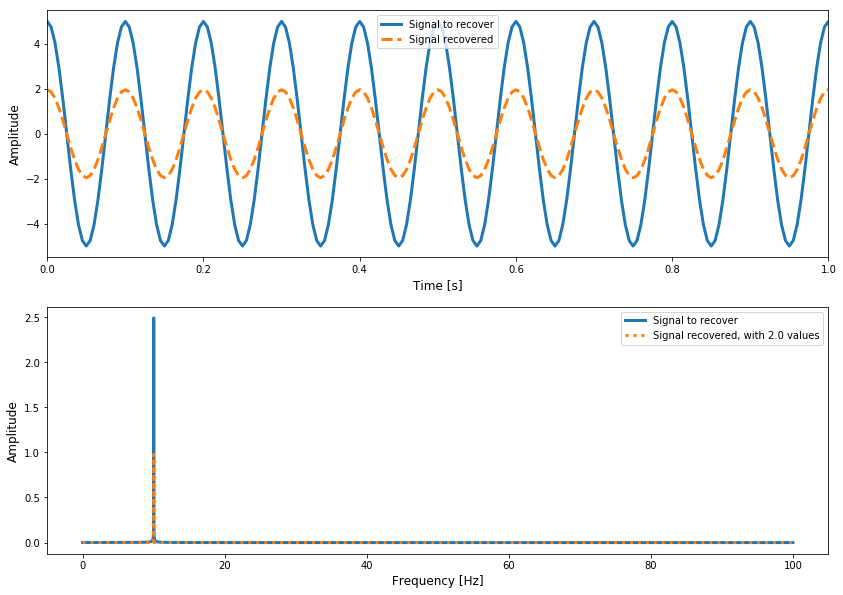

In [125]:
l1 = L1min()
cos1_recovered = l1.solver(signal_sampled, phi, w=130, max_iter=600, plot_result=False)

l1.plot_score(cos1.temporal, cos1_recovered, observation_time=obs_time)

### 2.2. Periodic signal with 5 frequencies 

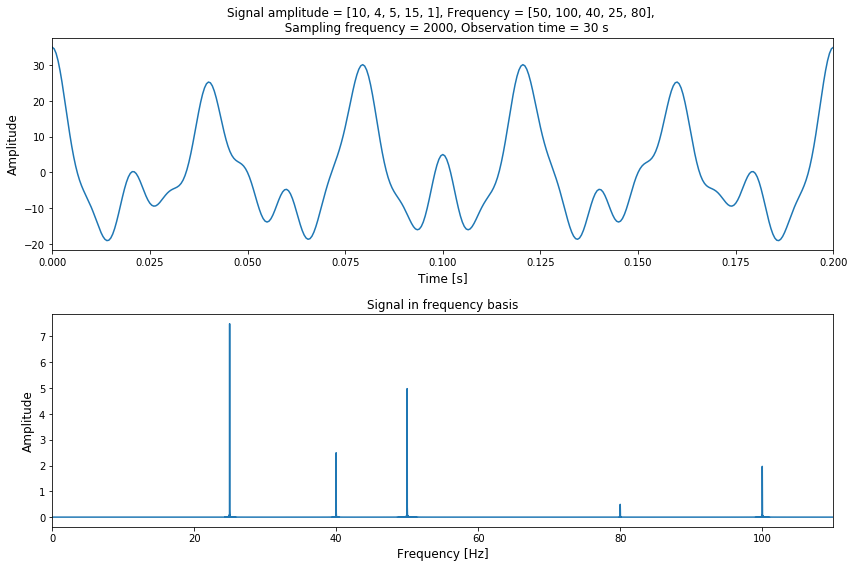

In [5]:
sf = SignalFrame()

A = [10, 4, 5, 15, 1]
f = [50, 100, 40, 25, 80]

obs_time = 30
cos2 = sf.signal_gen(a=A, f=f, observation_time=obs_time, noise_level=0, plot=True)

In [6]:
cos2.describe()

Fundamental frequencies : [50, 100, 40, 25, 80] Hz
Signal amplitudes : [10, 4, 5, 15, 1]
Observation time : 30 s
Signal definition : 60001 instants
Nyquist–Shannon criterion (rate) : 0.1



### 2.2.1 Higher than Nyquist-Shannon frequency

### 2.2.2 Under Nyquist-Shannon frequency


Sampling process: 
Law : Truncated gaussian1
Mean : centred ; Variance : 1
Lenght of initial signal : 60001 
Lenght of sampled signal: 1819
Sampling rate : 0.030


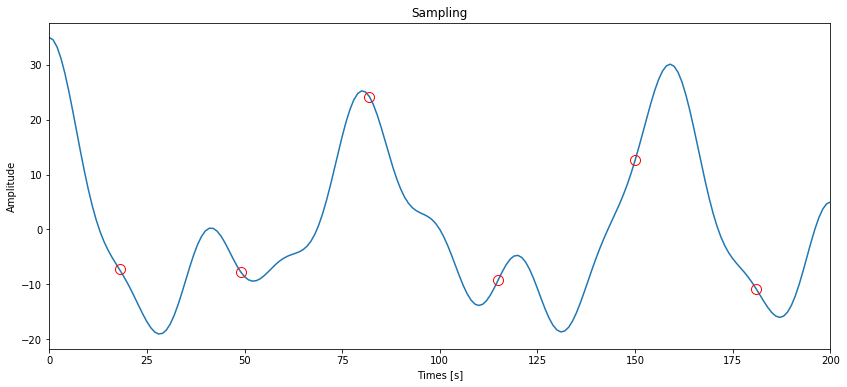

In [167]:
cos2.sampler_gauss(rate=0.03)

signal_sampled = cos2.temporal_sampled
phi = cos2.phi

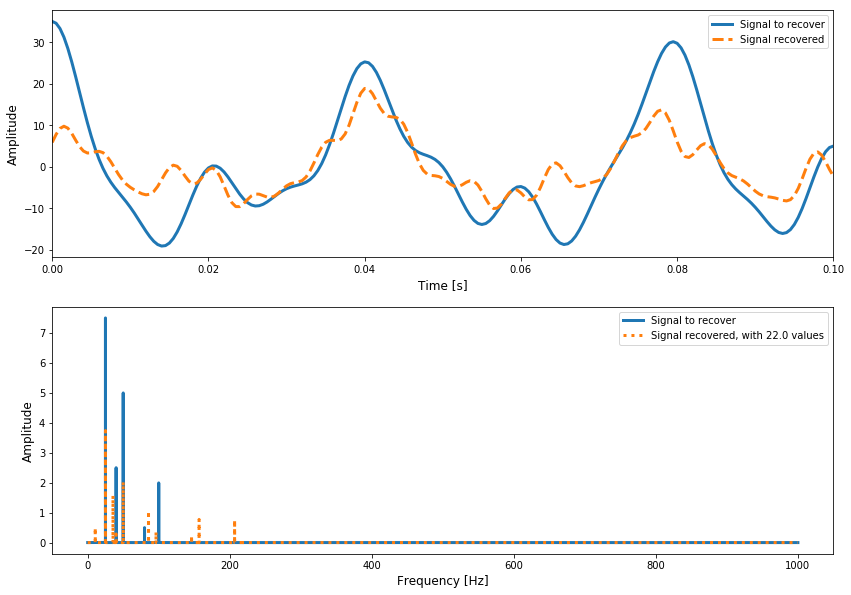

In [171]:
l1 = L1min()

cos2_recovered = l1.solver(signal_sampled, phi, w=2000, max_iter=150)
l1.plot_score(cos2.temporal, cos2_recovered, observation_time=obs_time)

### 2.2. Signal périodique composé de 5 fréquences avec bruit

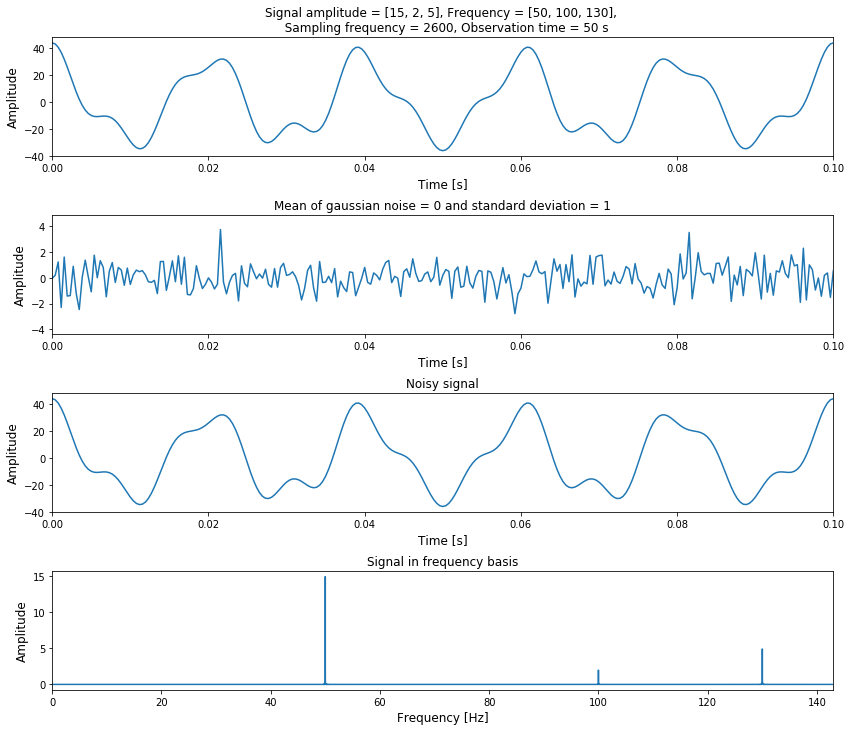

In [8]:
sf = SignalFrame()

A = [15, 2, 5]
f = [50, 100, 130]

obs_time = 50
cos3 = sf.signal_gen(a=A, f=f, observation_time=obs_time, noise_level=1, plot=True)

In [9]:
cos3.describe()

Fundamental frequencies : [50, 100, 130] Hz
Signal amplitudes : [15, 2, 5]
Observation time : 50 s
Signal definition : 130001 instants
Nyquist–Shannon criterion (rate) : 0.1




Sampling process: 
Law : Truncated gaussian
Mean : centred ; Variance : 1
Lenght of initial signal : 130001 
Lenght of sampled signal: 3940
Sampling rate : 0.030


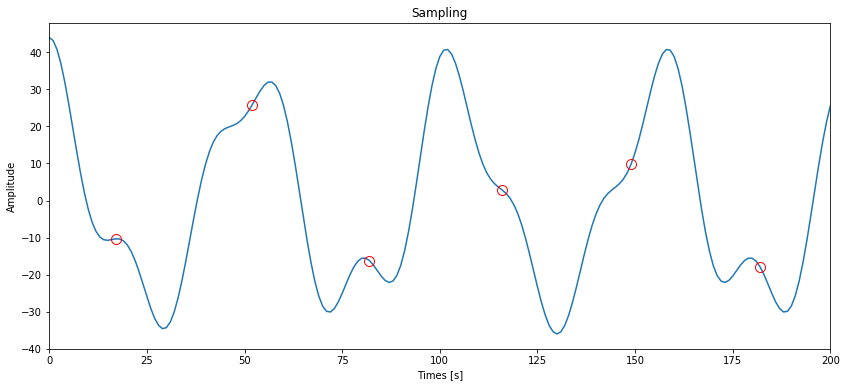

In [10]:
cos3.sampler_gauss(rate=0.03)

signal_sampled = cos3.temporal_sampled
phi = cos3.phi

/Users/Colin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


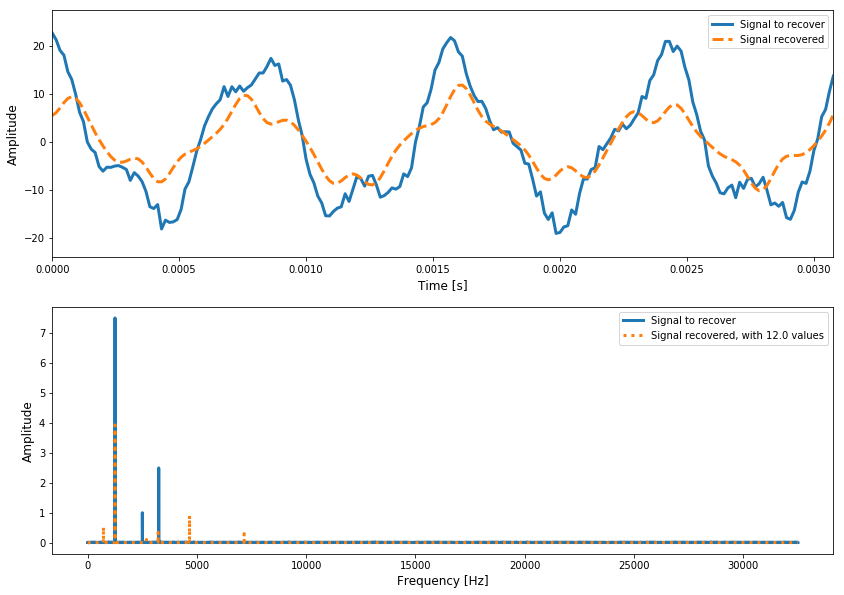

In [7]:
l1 = L1min()

cos3_recovered = l1.solver(signal_sampled, phi, w=2500, max_iter=200)
l1.plot_score(cos3.temporal, cos3_recovered)

## 3.  Signal measured

In [5]:
sf = SignalFrame()
s01 = sf.read_wave('../signals_wav/C_01.wav')

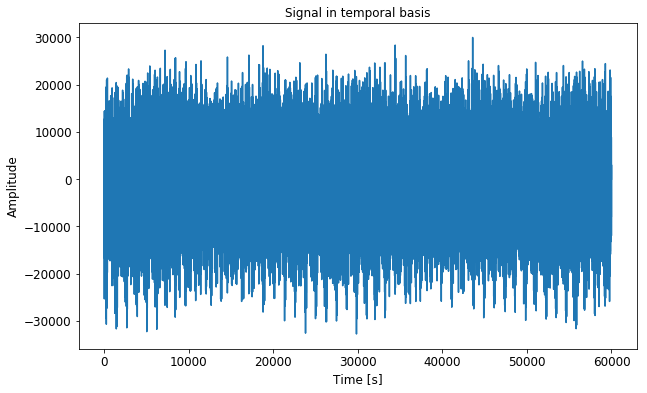

In [6]:
s01.plot(basis='temporal')

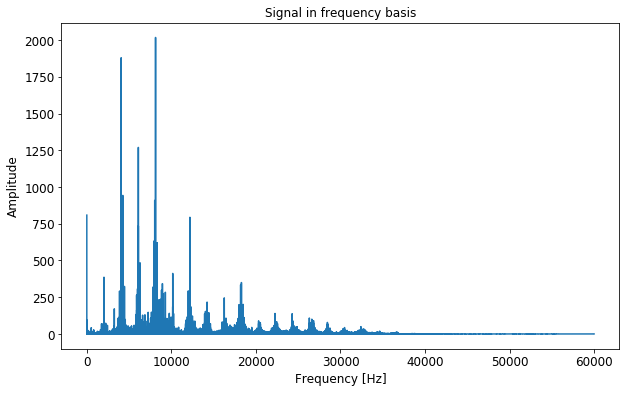

In [7]:
s01.rfft()
s01.plot(basis='freq')


Sampling process: 
Law : Truncated gaussian
Mean : centred ; Variance : 1
Lenght of initial signal : 60000 
Lenght of sampled signal: 6000
Sampling rate : 0.100


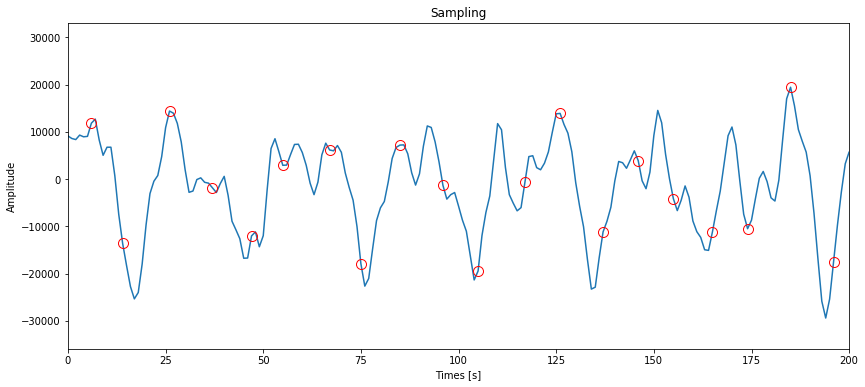

In [8]:
s01.sampler_gauss(rate=0.1)

signal_sampled = s01.temporal_sampled
phi = s01.phi

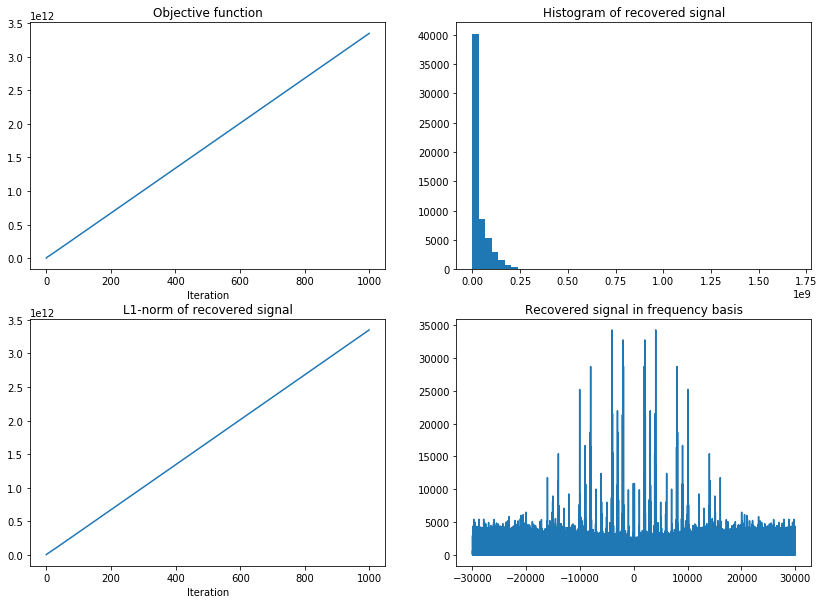

In [22]:
l1 = L1min()

s01_recovered = l1.solver(signal_sampled, phi, w=75000, max_iter=1000, plot=True)

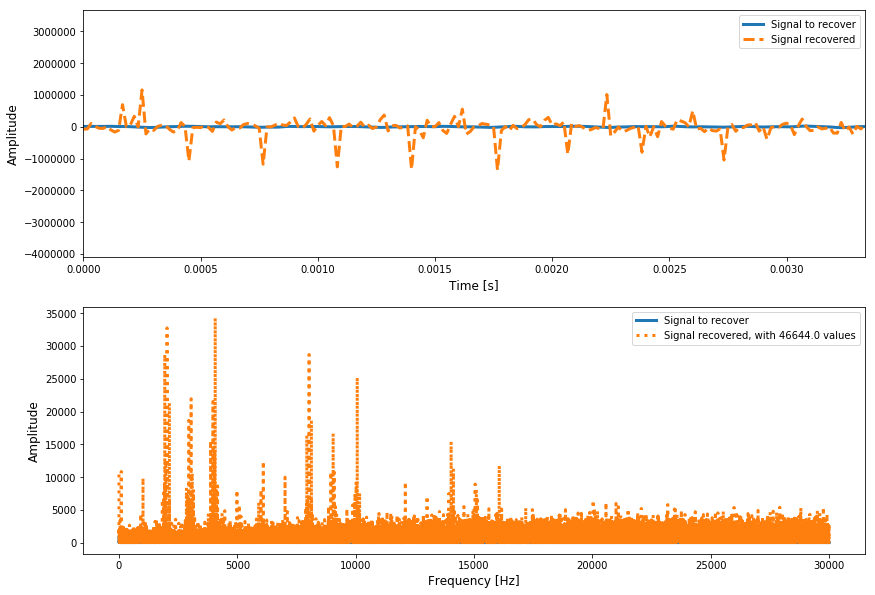

In [23]:
l1.plot_score(np.hstack((s01.temporal,0)), np.hstack((s01_recovered,0)))

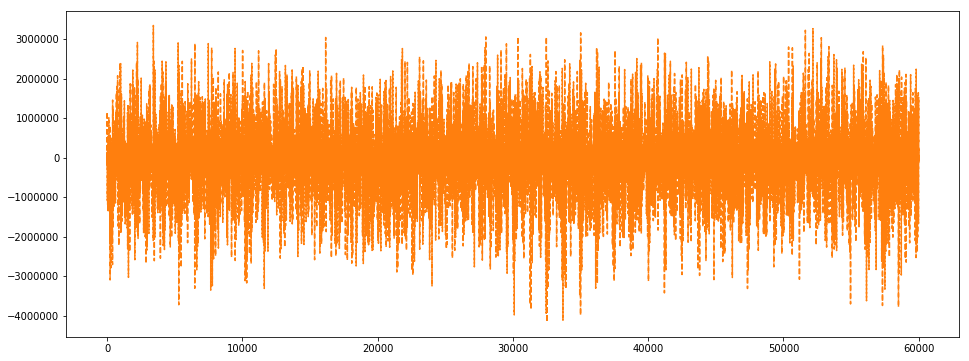

In [25]:
plt.figure(figsize=(16,6))
plt.plot(s01.temporal)
plt.plot(ifft(ifftshift(s01_recovered)), '--')

In [26]:
sf = SignalFrame()
s12 = sf.read_wave('../signals_wav/C_12.wav')

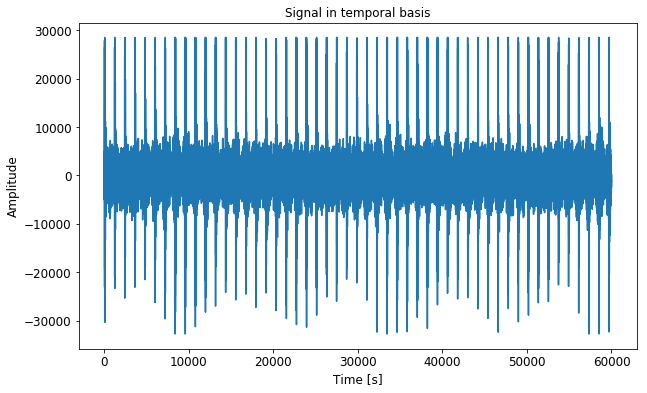

In [28]:
s12.plot(basis='temporal')

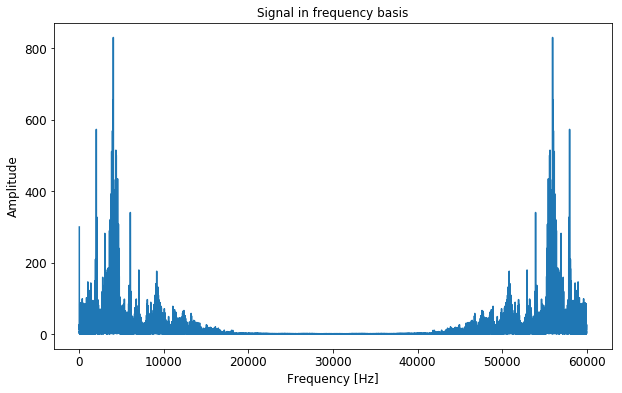

In [29]:
s12.plot(basis='freq')


Sampling process: 
Law : Truncated gaussian
Mean : centred ; Variance : 1
Lenght of initial signal : 60000 
Lenght of sampled signal: 6000
Sampling rate : 0.100


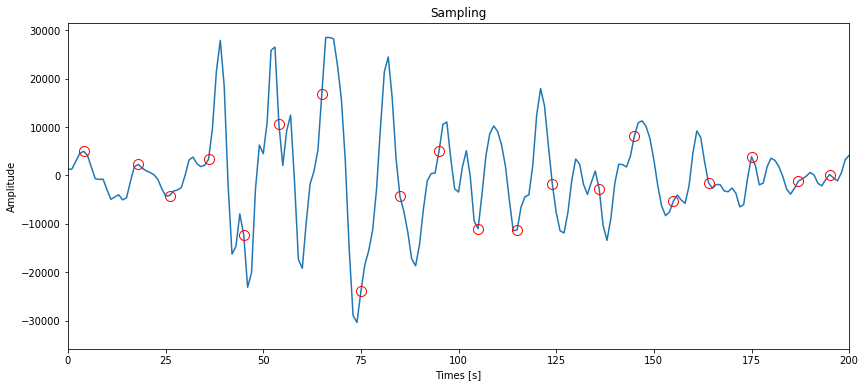

In [31]:
s12.sampler_gauss(rate=0.1)

signal_sampled = s12.temporal_sampled
phi = s12.phi

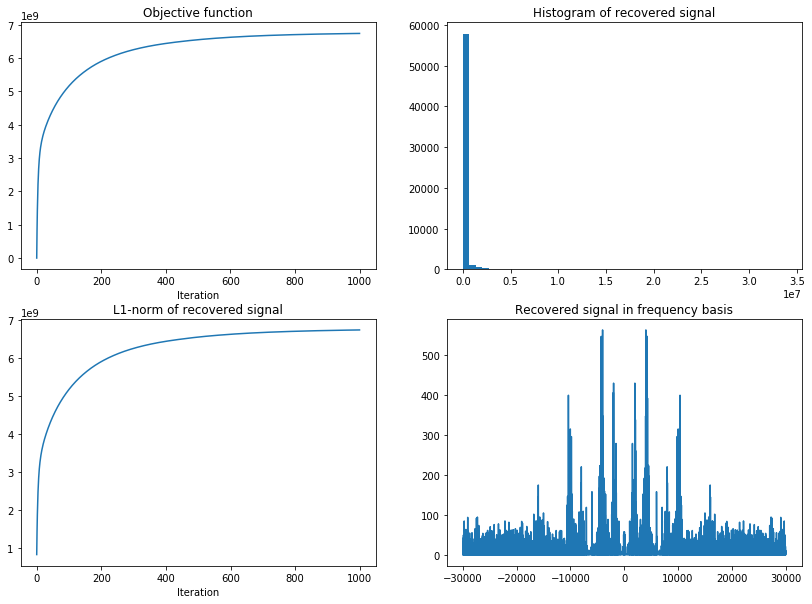

In [34]:
l1 = L1min()

s12_recovered = l1.solver(signal_sampled, phi, w=160000, max_iter=1000, plot=True)

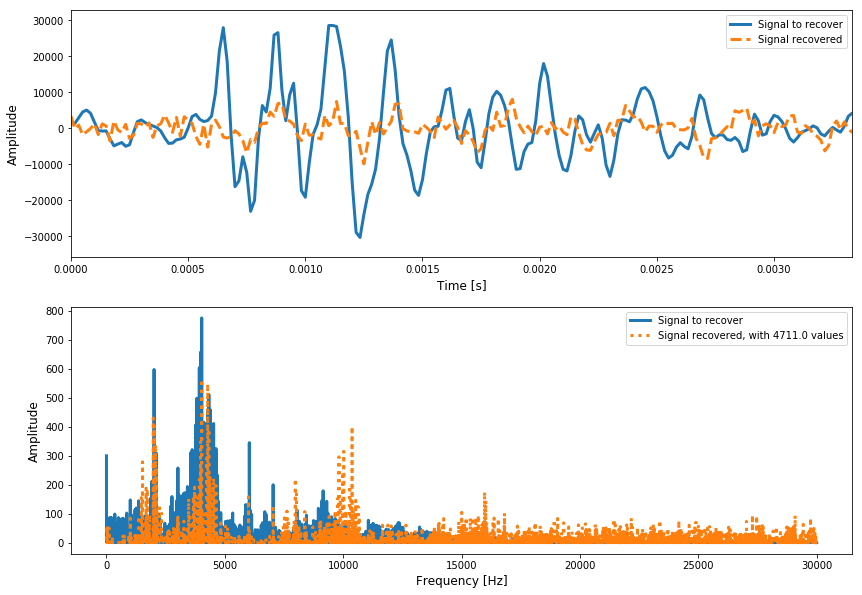

In [36]:
l1.plot_score(np.hstack((s12.temporal,0)), np.hstack((s12_recovered,0)))

### TODO : grid search for evaluate best constraint level on L1-norm

In [ ]:
l1 = L1min()

df = pd.DataFrame(['Lambda','L1 norm', 'L2 norm'])

w = 60
w_step = 1
i = 0
norm_l0 = 1
#while np.linalg.norm(cos1_recovered)!=2 and w < 11 and :
while norm_l0 != 0 :
    cos1_recovered = l1.solver(signal_sampled, phi, w=w, max_iter=500, plot_result=False)
    norm_l0 = int(np.linalg.norm(cos1_recovered, 0))
    norm_l2 = np.linalg.norm(cos1_recovered-cos1.temporal, 2)
    df = df.append({'Lambda':w, 'L0 norm':norm_l0, 'L2 norm':norm_l2}, ignore_index=True)    
    w += w_step
    i += 1
print(i+1)
print(w)    

plt.figure(figsize=(12,6))
plt.plot(df['Lambda'], df['L0 norm'], label='L0 norm')
plt.plot(df['Lambda'], df['L2 norm'], label='L1 norm')
plt.show()